# Projeto 1: Ciência dos Dados

## Pedro Paulo Perri

### Pergunta: 
A urbanização de um país está ligada ao seu IDH? O meio urbano costuma apresentar níveis de emissão de CO2 elevado em relação ao rural. Isso significa que quanto mais elevado for o IDH, maior será a emissão de CO2 per capita de um país?


### Para a realização deste estudo foram utilizados dados à respeito do IDH, da taxa de população urbana e da taxa de emissão de CO2 per capita dos países ao longo do tempo.

### Importando bibliotecas que serão utilizadas para realizar o estudo

In [111]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Lendo os arquivos que contêm os dados que serão utilizados no estudo

In [112]:
co2_emission = pd.read_excel('co2_emissions_tonnes_per_person.xlsx')
urban_pop = pd.read_excel('urban_population_percent_of_total.xlsx')
idh = pd.read_excel('hdi_human_development_index.xlsx')

### Definindo "geo" como índice

In [113]:
co2_idx = co2_emission.set_index('geo')
pop_idx = urban_pop.set_index('geo')
idh_idx = idh.set_index('geo')

### Criando um dataframe com os dados das três variáveis, para todos os anos.

In [114]:
df = idh_idx.join(co2_idx, how='inner', lsuffix = '_idh', rsuffix='_co2')
data = df.join(pop_idx, how ='inner', rsuffix = '_urbanpop')

### Para o início do estudo, foi determinado que o ano de 2005 seria utilizado com referência, por apresentar grande parte dos dados necessários para o estudo

### Discretizando as variáveis

In [115]:
faixa_idh = [0, 0.555, 0.699, 0.799, 1]
data2 = pd.DataFrame()
data2['2005_idh'] = pd.cut(data['2005_idh'], bins = faixa_idh)
data2['2005_idh'].cat.categories = ('Baixo', 'Médio', 'Elevado', 'Muito Elevado')

In [116]:
faixa_co2 =[0, 0.5, 0.8, 2, 6, 59]
data2['2005_co2'] = pd.cut(data['2005_co2'], bins = faixa_co2)
data2['2005_co2'].cat.categories = ('Muito Baixo', 'Baixo', 'Médio', 'Elevado', 'Muito Elevado')

In [117]:
faixa_pop = [0, 50, 100]
data2[2005] = pd.cut(data[2005], bins = faixa_pop)
data2[2005].cat.categories = ('Rural', 'Urbano')

### Retirando as colunas que não apresentam os dados necessários

In [118]:
data2 = data2.dropna()

In [119]:
data2.head(5)

,2005_idh,2005_co2,2005
geo,,,
Afghanistan,Baixo,Muito Baixo,Rural
Albania,Médio,Médio,Rural
Algeria,Médio,Elevado,Urbano
Angola,Baixo,Médio,Rural
Antigua and Barbuda,Elevado,Elevado,Rural


### Criando tabela entre IDH e Urbanização para o ano de 2005

In [120]:
ct = pd.crosstab(data2['2005_idh'], data2[2005], normalize='index')*100
ct.round(2)

2005,Rural,Urbano
2005_idh,,
Baixo,90.38,9.62
Médio,51.92,48.08
Elevado,13.16,86.84
Muito Elevado,0.00,100.00


A tabela acima mostra que, aparentemente, há relação entre o nível de IDH dos países e o nível de urbanização. Como se pode notar, nenhum país com IDH considerado "baixo" possui mais de 50% da sua população morando em zonas urbanas. Por outro lado, os países com IDH "Elevado" ou "Muito Elevado" são, em sua grande maioria, países nos quais a população se concentra nas zonas urbanas. Os países que apresentam IDH considerado "Médio" são em sua maioria rurais, mas há também países urbanos, embora sejam poucos. Isso se deve ao fato destes países apresentaram taxas de urbanização próximas a 50%. 

In [121]:
ct2 = pd.crosstab(data2[2005], data2['2005_co2'], normalize = 'index')*100
ct2.round(2)

2005_co2,Muito Baixo,Baixo,Médio,Elevado,Muito Elevado
2005,,,,,
Rural,49.37,6.33,29.11,12.66,2.53
Urbano,2.97,3.96,12.87,30.69,49.50


A tabela acima mostra que países rurais tendem a emitir uma quantidade de CO2 per capita menor do que países urbanos. Essa relação aparenta existir pelo fato de países com maior concentração populacional em áreas urbanas possuirem maior número de indústrias e fábricas, além de maior circulação de pessoas em automóveis.

In [122]:
ct3 = pd.crosstab(data2['2005_idh'], data2['2005_co2'], normalize='index')*100
ct3.round(2)

2005_co2,Muito Baixo,Baixo,Médio,Elevado,Muito Elevado
2005_idh,,,,,
Baixo,76.92,9.62,13.46,0.00,0.00
Médio,3.85,5.77,48.08,36.54,5.77
Elevado,0.00,2.63,10.53,44.74,42.11
Muito Elevado,0.00,0.00,0.00,13.16,86.84


O desenvolvimento desta tabela que compara o IDH e a emissão de CO2 serve para mostrar o que era esperado através das conclusões tiradas a partir das tabelas anteriores. Ou seja, que o nível de emissão de CO2 per capita dos países tem relação com seu nível de IDH, de forma que quanto mais desenvolvido o país é, maior sua emissão de CO2 per capita tende a ser.

### Salvando o arquivo como CSV

In [123]:
data2.to_csv('Dados.csv')

### Lendo arquivo CSV

In [124]:
d = pd.read_csv('Dados.csv')

### Para garantir que a análise obtida anteriormente é válida, o estudo foi expandido para os anos de 2008, 2009 e 2010

### Criando dataframe com os dados dos anos a serem estudados a seguir

In [125]:
data3 = pd.DataFrame()
lista = [2008, 2009, 2010]
for i in lista:
    data3['{0}_idh'.format(i)]=idh[i]
    data3['{0}_co2'.format(i)]=co2_emission[i]
    data3['{0}_pop'.format(i)]=urban_pop[i]
    
data3 = data3.dropna()

### Criando dataframe com os dados do ano de 2008

In [126]:
df2008 = pd.DataFrame()
df2008['2008_idh'] = data3['2008_idh']
df2008['2008_co2'] = data3['2008_co2']
df2008['2008_pop'] = data3['2008_pop']



### Criando coluna de dados discretizados do ano de 2008 

In [127]:
faixa_idh = np.arange(0, 1.2, 0.2)
df2008['idh2008_ordinal'] = pd.cut(df2008['2008_idh'], bins = faixa_idh)
df2008['idh2008_ordinal'].cat.categories = ('Muito Baixo', 'Baixo', 'Médio', 'Elevado', 'Muito Elevado')

### Plotando gráficos para a comparação das variáveis do estudo (2008)

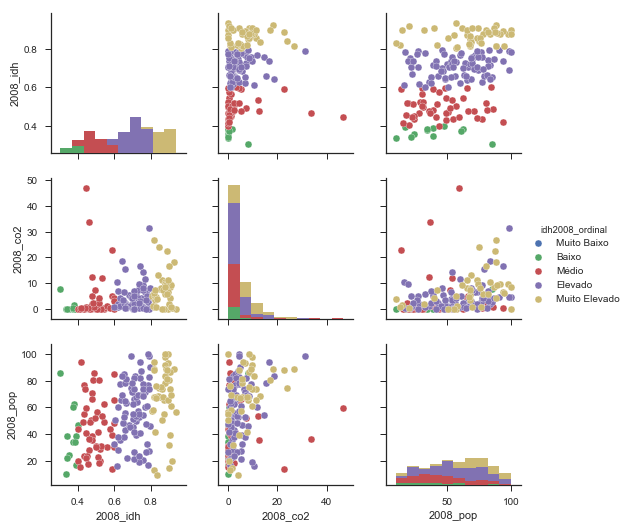

In [128]:
sns.set(style="ticks")
sns.pairplot(df2008,hue="idh2008_ordinal")

### Criando dataframe com os dados do ano de 2009

In [129]:
df2009 = pd.DataFrame()
df2009['2009_idh'] = data3['2009_idh']
df2009['2009_co2'] = data3['2009_co2']
df2009['2009_pop'] = data3['2009_pop']

### Criando coluna de dados do IDH de 2009 discretizado

In [130]:
faixa_idh = np.arange(0, 1.2, 0.2)
df2009['idh2009_ordinal'] = pd.cut(df2009['2009_idh'], bins = faixa_idh)
df2009['idh2009_ordinal'].cat.categories = ('Muito Baixo', 'Baixo', 'Médio', 'Elevado', 'Muito Elevado')

### Plotando gráficos para comparação das variáveis do estudo, do ano de 2009

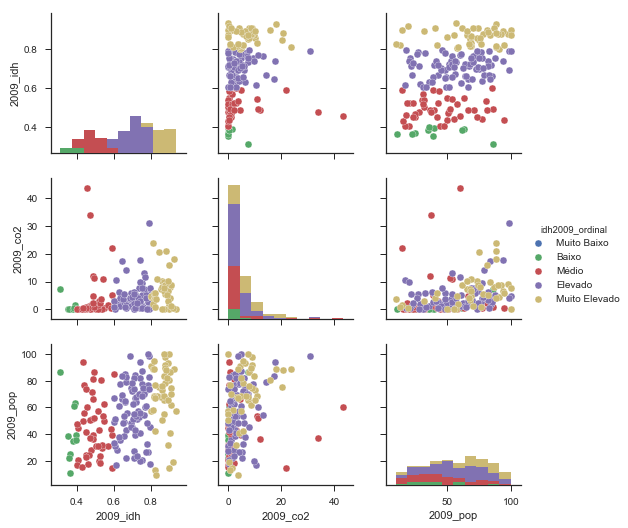

In [131]:
sns.set(style="ticks")
sns.pairplot(df2009,hue="idh2009_ordinal")

### Criando dataframe com os dados de 2010

In [132]:
df2010 = pd.DataFrame()
df2010['2010_idh'] = data3['2010_idh']
df2010['2010_co2'] = data3['2010_co2']
df2010['2010_pop'] = data3['2010_pop']

### Criando coluna de dados do IDH de 2010 discretizado

In [133]:
faixa_idh = np.arange(0, 1.2, 0.2)
df2010['idh2010_ordinal'] = pd.cut(df2010['2010_idh'], bins = faixa_idh)
df2010['idh2010_ordinal'].cat.categories = ('Muito Baixo', 'Baixo', 'Médio', 'Elevado', 'Muito Elevado')

### Plotando gráficos para comparação das variáveis do estudo, do ano de 2010

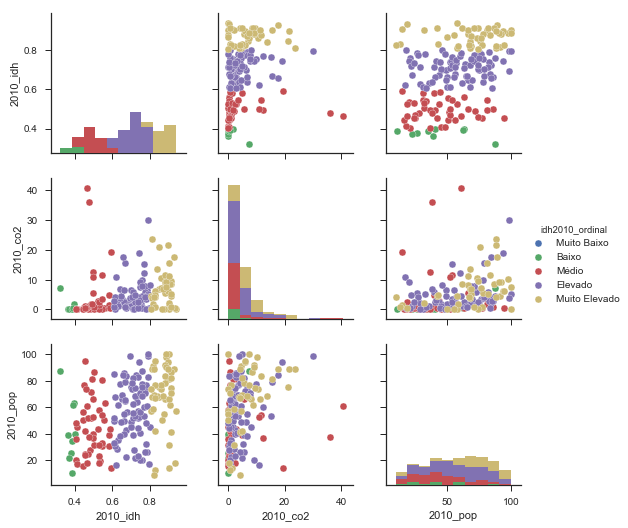

In [134]:
sns.set(style="ticks")
sns.pairplot(df2010,hue="idh2010_ordinal")

### Análise dos gráficos obtidos

Os gráficos obtidos acima, com base nos dados dos anos de 2008, 2009 e 2010, não deixam tão clara quanto as tabelas dos dados discretizados, referentes a 2005, a correlação entre o IDH e a população urbana dos países e suas emissões de CO2 per capita. Na realidade, estes gráficos mostram que quando é feita uma análise em cima dos números referentes a estas variáveis, ou seja, dos dados não discretizados, a correlação aparenta ser bem menor do que antes, quando a análise dos dados discretizados era a única que havia sido feita. 

Pelo fato de existir diferença nas conclusões obtidas a partir das análises dos dados discretizados e não discretizados, foi utilizada outra forma de correlacionar as variáveis para checar qual forma de analisar estes dados é mais precisa ou mais correta.

### Criando reta correspondente à dispersão da comparação das variáveis

In [154]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='red')
 
   

### Plotando os gráficos de dispersão do ano de 2008

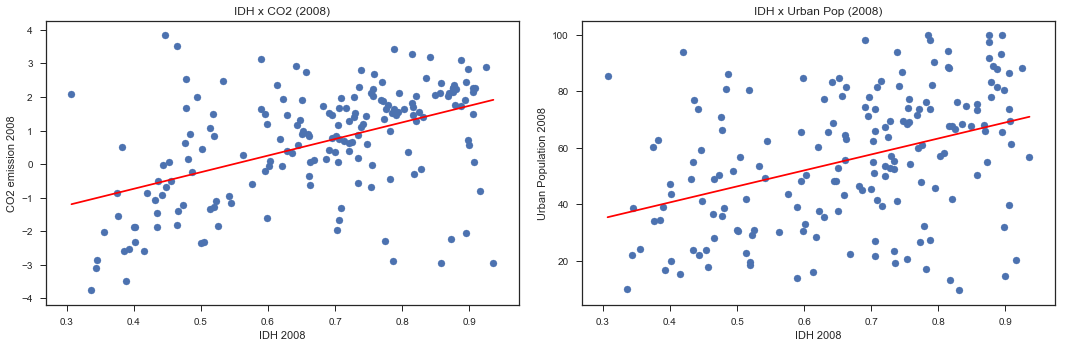

Correlação IDH e emissão de CO2(2008):0.24286198249625213
Correlação IDH e população urbana(2008):0.3899035170091473


In [159]:
a = df2008['2008_idh']
b = np.log(df2008['2008_co2'])

fig = plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
reta(a,b)
plt.scatter(a, b)
plt.title('IDH x CO2 (2008)')
plt.ylabel('CO2 emission 2008')
plt.xlabel('IDH 2008')

c = df2008['2008_idh']
d = df2008['2008_pop']
plt.subplot(1, 2, 2)
reta(c,d)
plt.scatter(c, d)
plt.title('IDH x Urban Pop (2008)')
plt.xlabel('IDH 2008')
plt.ylabel('Urban Population 2008')


plt.tight_layout()
plt.show()

print('Correlação IDH e emissão de CO2(2008):{0}'.format(df2008['2008_idh'].corr(df2008['2008_co2'])))
print('Correlação IDH e população urbana(2008):{0}'.format(df2008['2008_idh'].corr(df2008['2008_pop'])))

### Plotando gráficos de dispersão do ano de 2009

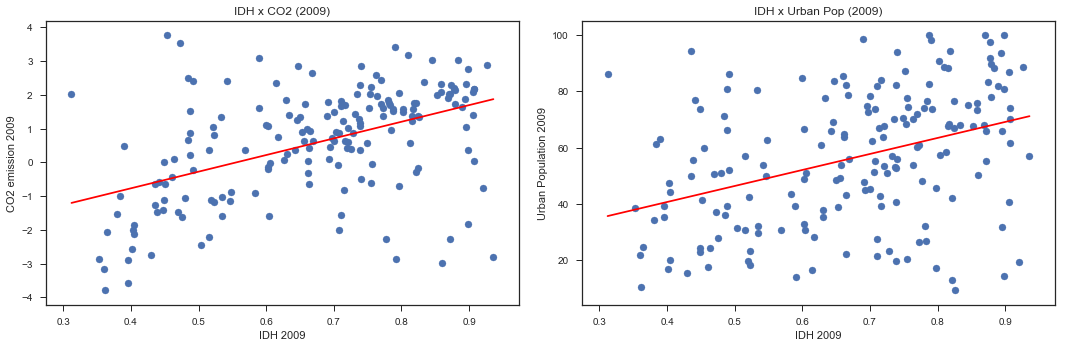

Correlação IDH e emissão de CO2(2009):0.2312321865762573
Correlação IDH e população urbana(2009):0.38469684594856823


In [160]:
a = df2009['2009_idh']
b = np.log(df2009['2009_co2'])

fig = plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
reta(a,b)
plt.scatter(a, b)
plt.title('IDH x CO2 (2009)')
plt.ylabel('CO2 emission 2009')
plt.xlabel('IDH 2009')

c = df2009['2009_idh']
d = df2009['2009_pop']
plt.subplot(1, 2, 2)
reta(c,d)
plt.scatter(c, d)
plt.title('IDH x Urban Pop (2009)')
plt.xlabel('IDH 2009')
plt.ylabel('Urban Population 2009')


plt.tight_layout()
plt.show()

print('Correlação IDH e emissão de CO2(2009):{0}'.format(df2009['2009_idh'].corr(df2009['2009_co2'])))
print('Correlação IDH e população urbana(2009):{0}'.format(df2009['2009_idh'].corr(df2009['2009_pop'])))

### Plotando os gráficos de dispersão do ano de 2010

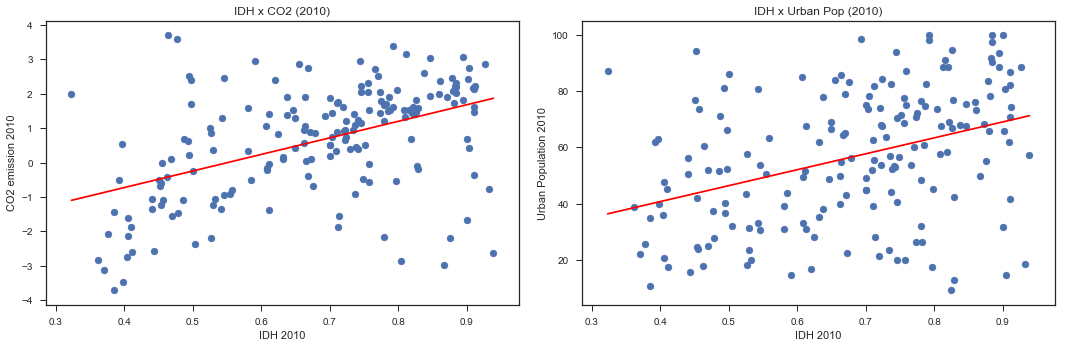

Correlação IDH e emissão de CO2(2010):0.23855208424509344
Correlação IDH e população urbana(2010):0.38093604674118847


In [163]:
a = df2010['2010_idh']
b = np.log(df2010['2010_co2'])

fig = plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
reta(a,b)
plt.scatter(a, b)
plt.title('IDH x CO2 (2010)')
plt.ylabel('CO2 emission 2010')
plt.xlabel('IDH 2010')

c = df2010['2010_idh']
d = df2010['2010_pop']
plt.subplot(1, 2, 2)
reta(c,d)
plt.scatter(c, d)
plt.title('IDH x Urban Pop (2010)')
plt.xlabel('IDH 2010')
plt.ylabel('Urban Population 2010')


plt.tight_layout()
plt.show()

print('Correlação IDH e emissão de CO2(2010):{0}'.format(df2010['2010_idh'].corr(df2010['2010_co2'])))
print('Correlação IDH e população urbana(2010):{0}'.format(df2010['2010_idh'].corr(df2010['2010_pop'])))

### Apresentando novamente as correlações obitdas em cada ano estudado

In [165]:
print('2008')
print('Correlação IDH e emissão de CO2(2008):{0}'.format(df2008['2008_idh'].corr(df2008['2008_co2'])))
print('Correlação IDH e população urbana(2008):{0}'.format(df2008['2008_idh'].corr(df2008['2008_pop'])))
print('')
print('2009')
print('Correlação IDH e emissão de CO2(2009):{0}'.format(df2009['2009_idh'].corr(df2009['2009_co2'])))
print('Correlação IDH e população urbana(2009):{0}'.format(df2009['2009_idh'].corr(df2009['2009_pop'])))
print('')
print('2010')
print('Correlação IDH e emissão de CO2(2010):{0}'.format(df2010['2010_idh'].corr(df2010['2010_co2'])))
print('Correlação IDH e população urbana(2010):{0}'.format(df2010['2010_idh'].corr(df2010['2010_pop'])))

2008
Correlação IDH e emissão de CO2(2008):0.24286198249625213
Correlação IDH e população urbana(2008):0.3899035170091473

2009
Correlação IDH e emissão de CO2(2009):0.2312321865762573
Correlação IDH e população urbana(2009):0.38469684594856823

2010
Correlação IDH e emissão de CO2(2010):0.23855208424509344
Correlação IDH e população urbana(2010):0.38093604674118847


### Conclusão final com base nos gráficos de dispersão e na correlação entre as variáveis

Os gráficos de dispersão obtidos mostram que, assim como havia sido constatado em ambas as análises anteriores a essa, há correlação entre o IDH e a taxa de população urbana dos países, bem como com suas taxas de emissão de CO2 per capita. No entanto, prova que a análise da forma não discretizada dos dados é mais confiável que a análise realizada com os dados discretizados. O cálculo da correlação entre as variáveis estudadas também reforça que a análise dos dados não discretizados foi mais precisa, pois prova que por mais que exista uma correlação entre as variáveis, esta correlação é fraca. 

O estudo destes dados para diversos anos nos permite afirmar que a correlação apresentada é aceitável, já que varia pouco ao longo dos anos. Além disso, o motivo para esta correlção variar pouco com o passar dos anos se deve ao fato do intervalo de tempo escolhido para análise ser relativamente pequeno para as variáveis que estavam sendo estudadas, de forma que se tivessem sido escolhidos anos separados por uma década ou algo assim a correlação provavelmente variaria mais.